In [183]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import csv

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [185]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns


In [186]:
data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
data

,user_id,activity,timestamp,acc_x,acc_y,acc_z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098204,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098205,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098206,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098207,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [187]:
from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data['activity'].values.ravel())
# dummy=data_reformat.groupby(['class'])
# dummy.head(10)

data

dummy2=data.groupby(['activity'])
dummy2.head(10)

,user_id,activity,timestamp,acc_x,acc_y,acc_z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526,1
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926,1
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340,1
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871,1
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062,1


In [188]:
data_train = data[data['user_id'] <=28]
data_test =  data[data['user_id'] > 28]
#data_train = data[data['user_id'] >=8]
#data_test =  data[data['user_id'] < 8]
x_train = data_train[['acc_x','acc_y','acc_z']]
x_test = data_test[['acc_x','acc_y','acc_z']]
y_train = data_train[['ActivityEncoded']]
y_test = data_test[['ActivityEncoded']]
y_train

,ActivityEncoded
8489,5
8490,5
8491,5
8492,5
8493,5
...,...
1098204,2
1098205,2
1098206,2
1098207,2


In [189]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_training_scaled = scaler.fit_transform(x_train)
x_training_scaled

array([[0.51016316, 0.74190794, 0.48893191],
       [0.49570273, 0.75152636, 0.48789509],
       [0.4898497 , 0.74293849, 0.48478463],
       ...,
       [0.7252275 , 0.45977301, 0.54529307],
       [0.72320526, 0.45775536, 0.54630804],
       [0.72017189, 0.46103405, 0.54326313]])

In [190]:
features_set = []
labels_preencoded = []
x_training_scaled[0:200]
x_training_scaled[0:200,0]
x_training_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 834600, 200):
    features_set.append([x_training_scaled[i:i+200, 0],x_training_scaled[i:i+200, 1],x_training_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_train["ActivityEncoded"][i: i+200])[0][0]
    labels_preencoded.append(max_labels_perwindow)

len(labels)
len(features_set)
labels = to_categorical(labels_preencoded)
#len(labels)
#labels
labels_preencoded
count=0
#for element in labels_preencoded:
#    if (element == 0):
#          count+=1
#count

In [191]:
# # features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
#features_set.shape[0]
#features_set.shape[1]
#features_set = np.reshape(features_set, (4173,600,1))
features_set = np.reshape(features_set, (4173,200,3))
#features_set = np.reshape(features_set, (features_set.shape[0], 240))
features_set.shape

(4173, 200, 3)

In [192]:
features_set

array([[[0.51016316, 0.49570273, 0.4898497 ],
        [0.49948999, 0.49948999, 0.51119605],
        [0.4984571 , 0.49294836, 0.49363695],
        ...,
        [0.52176451, 0.43916459, 0.49480721],
        [0.47718129, 0.41013365, 0.51312435],
        [0.48962312, 0.59088579, 0.64134433]],

       [[0.48227519, 0.56731629, 0.58659686],
        [0.6255023 , 0.64788154, 0.49363695],
        [0.58384249, 0.52186922, 0.58384249],
        ...,
        [0.49860889, 0.46750431, 0.50033692],
        [0.47337962, 0.40045667, 0.48478463],
        [0.50033692, 0.67452253, 0.50517541]],

       [[0.56249615, 0.50258865, 0.58005523],
        [0.65752183, 0.56043037, 0.56731629],
        [0.57041495, 0.51016316, 0.62068215],
        ...,
        [0.45298884, 0.50621223, 0.47130598],
        [0.58708412, 0.65033009, 0.4021847 ],
        [0.43259806, 0.46266582, 0.47337962]],

       ...,

       [[0.72320526, 0.72320526, 0.72219414],
        [0.72219414, 0.72219414, 0.72118301],
        [0.72118301, 0

In [193]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [194]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(Dense(units=60, activation='relu', input_shape=(200,3)))
model.add(Dropout(0.1))
model.add(Dense(units=60, activation='relu'))
model.add(Dropout(0.1))
# model.add(LSTM(36,return_sequences=True,input_shape=(200, 3)))
model.add(LSTM(36,return_sequences=True))
# Adding a dropout layer
model.add(Dropout(0.1))
model.add(LSTM(units=18))
# Adding a dropout layer
model.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200, 60)           240       
_________________________________________________________________
dropout_25 (Dropout)         (None, 200, 60)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 200, 60)           3660      
_________________________________________________________________
dropout_26 (Dropout)         (None, 200, 60)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 200, 36)           13968     
_________________________________________________________________
dropout_27 (Dropout)         (None, 200, 36)           0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 18)              

In [196]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])
labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [197]:
# model.fit(features_set, labels, epochs = 30, batch_size = 16, verbose = 2)
# Fit the model to the training data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_preencoded),
                                                 labels_preencoded)
model.fit(features_set,labels,epochs=100, batch_size = 16, class_weight=class_weights, verbose=2)



Epoch 1/100
 - 54s - loss: 1.4687 - accuracy: 0.3925
Epoch 2/100
 - 52s - loss: 1.2554 - accuracy: 0.4960
Epoch 3/100
 - 52s - loss: 1.1139 - accuracy: 0.6235
Epoch 4/100
 - 47s - loss: 1.0616 - accuracy: 0.6408
Epoch 5/100
 - 48s - loss: 0.9604 - accuracy: 0.6751
Epoch 6/100
 - 47s - loss: 0.8671 - accuracy: 0.7057
Epoch 7/100
 - 47s - loss: 0.8357 - accuracy: 0.7136
Epoch 8/100
 - 47s - loss: 0.8102 - accuracy: 0.7139
Epoch 9/100
 - 47s - loss: 0.7847 - accuracy: 0.7146
Epoch 10/100
 - 50s - loss: 0.7539 - accuracy: 0.7273
Epoch 11/100
 - 50s - loss: 0.8187 - accuracy: 0.7033
Epoch 12/100
 - 49s - loss: 0.7352 - accuracy: 0.7163
Epoch 13/100
 - 50s - loss: 0.6992 - accuracy: 0.7407
Epoch 14/100
 - 50s - loss: 0.6785 - accuracy: 0.7347
Epoch 15/100
 - 53s - loss: 0.6460 - accuracy: 0.7431
Epoch 16/100
 - 57s - loss: 0.6204 - accuracy: 0.7546
Epoch 17/100
 - 60s - loss: 0.6150 - accuracy: 0.7515
Epoch 18/100
 - 58s - loss: 0.6127 - accuracy: 0.7568
Epoch 19/100
 - 69s - loss: 0.5875 - 

In [198]:
x_test

,acc_x,acc_y,acc_z
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164
...,...,...,...
832897,8.200000,4.520000,0.150000
832898,8.960000,4.020000,1.460000
832899,7.970000,4.750000,0.610000
832900,8.010000,4.790000,0.690000


In [199]:
y_test

,ActivityEncoded
0,1
1,1
2,1
3,1
4,1
...,...
832897,3
832898,3
832899,3
832900,3


In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_testing_scaled = scaler.fit_transform(x_test)
x_testing_scaled
len(x_testing_scaled)

263424

In [201]:
features_set_2 = []
labels_2 = []
#x_testing_scaled[0:200]
#x_testing_scaled[0:200,0]
#x_testing_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 263400, 200):
    features_set_2.append([x_testing_scaled[i:i+200, 0],x_testing_scaled[i:i+200, 1],x_testing_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_test["ActivityEncoded"][i: i+200])[0][0]
    labels_2.append(max_labels_perwindow)

len(features_set_2)
labels_2 = to_categorical(labels_2)
len(labels_2)
len(features_set_2)

1317

In [202]:
features_set_2, labels_2 = np.array(features_set_2), np.array(labels_2)
#test_features_2 = np.array(features_set_2)
# test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
# Making Predictions

features_set_2.shape

(1317, 3, 200)

In [203]:
features_set_2= np.reshape(features_set_2,(1317,200,3))
features_set_2.shape

(1317, 200, 3)

In [204]:
model_loss, model_accuracy = model.evaluate(
    features_set_2, labels_2, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.7459958769273559, Accuracy: 0.8314350843429565


In [207]:
%matplotlib inline
import matplotlib.pyplot as plt

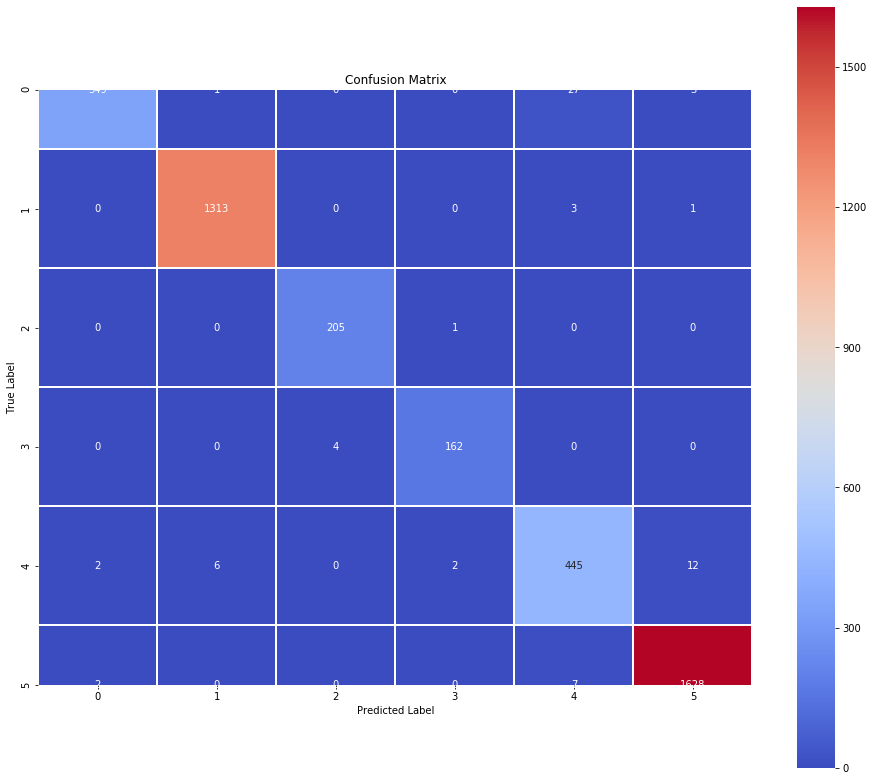

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       380
           1       0.99      1.00      1.00      1317
           2       0.98      1.00      0.99       206
           3       0.98      0.98      0.98       166
           4       0.92      0.95      0.94       467
           5       0.99      0.99      0.99      1637

    accuracy                           0.98      4173
   macro avg       0.98      0.97      0.97      4173
weighted avg       0.98      0.98      0.98      4173



array([[3.8483739e-04, 1.8239021e-05, 1.5497208e-06, 3.9339066e-06,
        2.7686357e-04, 4.8950040e-01],
       [1.7365813e-04, 2.0503998e-05, 9.5367432e-07, 2.1755695e-06,
        1.3583899e-04, 5.1592553e-01],
       [3.2016635e-04, 3.0010939e-05, 8.6426735e-07, 1.7285347e-06,
        1.9392371e-04, 5.6955135e-01],
       ...,
       [8.2144141e-04, 4.7320127e-04, 9.8099935e-01, 2.4299324e-03,
        2.2913218e-03, 8.9120865e-04],
       [9.1069937e-04, 4.4909120e-04, 9.7955656e-01, 2.7890503e-03,
        2.2800565e-03, 8.5890293e-04],
       [1.0211670e-03, 3.8060336e-04, 9.7394109e-01, 3.8207143e-03,
        2.3931081e-03, 9.8307698e-04]], dtype=float32)

In [208]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(16, 14))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels= [0,1,2,3,4,5],
                yticklabels= [0,1,2,3,4,5],
                annot=True,
                square=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels_pred_test = model.predict(features_set)
labels_pred_test
# # Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test

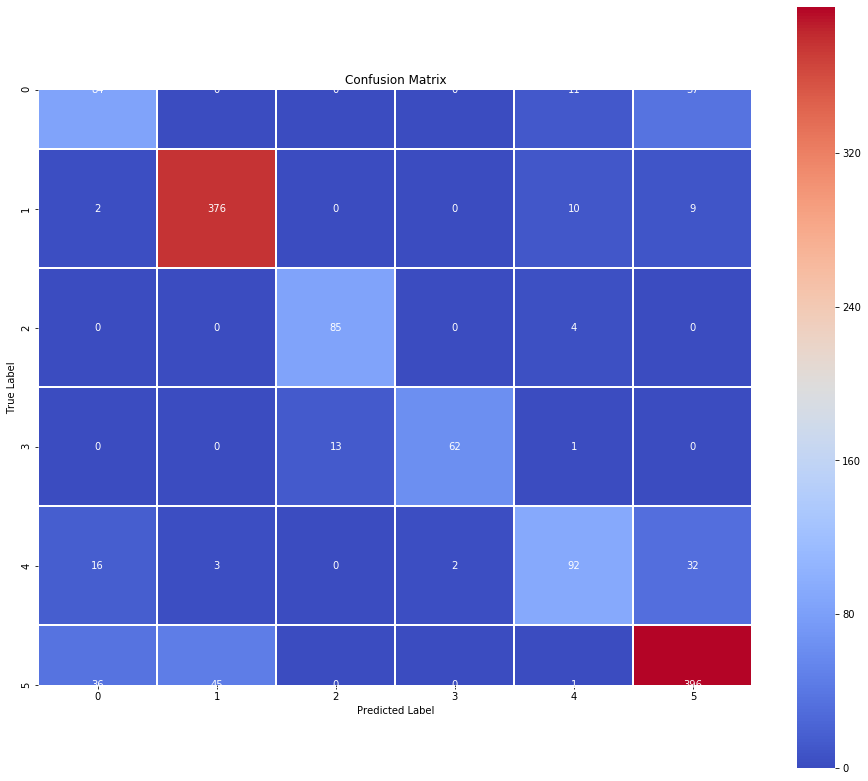

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       132
           1       0.89      0.95      0.92       397
           2       0.87      0.96      0.91        89
           3       0.97      0.82      0.89        76
           4       0.77      0.63      0.70       145
           5       0.84      0.83      0.83       478

    accuracy                           0.83      1317
   macro avg       0.82      0.80      0.81      1317
weighted avg       0.83      0.83      0.83      1317



array([[9.8198652e-05, 6.9823802e-02, 3.5762787e-07, 3.2782555e-07,
        2.1308661e-05, 1.3828278e-05],
       [2.4396181e-04, 7.4565488e-01, 2.6822090e-06, 5.3644180e-07,
        4.9339235e-03, 1.2040138e-05],
       [1.1962652e-04, 9.3988204e-01, 1.7583370e-06, 1.8775463e-06,
        1.2466908e-03, 2.7626753e-05],
       ...,
       [6.6306889e-03, 2.4008751e-04, 5.0684732e-01, 8.1884772e-02,
        4.8869848e-03, 8.7758601e-03],
       [1.0211468e-03, 3.6409497e-04, 9.6992093e-01, 3.9350986e-03,
        2.3843646e-03, 8.9737773e-04],
       [8.4535209e-03, 1.3974610e-04, 2.9762197e-01, 1.0747218e-01,
        4.5516416e-03, 9.6542556e-03]], dtype=float32)

In [209]:
labels_pred_test = model.predict(features_set_2)
labels_pred_test
# # Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels_2, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test